# **Linear Discriminant Analysis** or **LDA** is 
* A dimensionality reduction technique used to reduce the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible. 
* Using LDA based classification, we can find discriminative features for a given audio segment to achieve the task of Automatic Speech Classification such that speech belonging to the same class are close together, but samples from different classes are far apart from each other.

##### Dataset :
**The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [2]:
from scipy.io import wavfile
import os
import random
import numpy as np
import librosa

#03-01-02-01-01-02-01

In [97]:
# import IPython
# IPython.display.Audio("audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav", autoplay =True)

In [4]:
# sr, audio_np= wavfile.read("audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")
# sr

In [5]:
# file_name = "audio_speech_actors_01-24/Actor_04/03-01-01-01-01-01-04.wav"
# audio, sample_rate = librosa.load(file_name, res_type='kaiser_best', sr=None, duration=2.0, offset=0.95) 

# mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
# print(mfccs.shape)


# melspec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
# print(melspec.shape)

 
# centr = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
# print(centr.shape)


# zcr = librosa.feature.zero_crossing_rate(y = audio)
# print(zcr.shape)

(13, 188)
(128, 188)
(1, 188)
(1, 188)


#### MFCCS
- MFCC is a very compressible representation, often using just 13 -20 coefficients.
- Our ear has cochlea which basically has more filters at low frequency and very few filters at higher frequency. 
- This can be mimicked using Mel filters. 
- So the idea of MFCC is to convert time domain signals into frequency domain signal by mimicking cochlea function using Mel filters.

#### MelSpectrogram
- mel scale of a spectrogram that essentially describes the spectrum of frequencies of a signal as it varies with time.
- MelScale is quasi-logarithmic spacing roughly resembling the resolution of the human auditory system.

#### Spectral Centroid
- the weighted mean of the frequencies present in the signal.
- helps understand the tone.

#### Zero Crossing Rate
- Rate at which a signal changes sign, [___ -> negative -> 0 -> positive -> 0 -> negative -> ___]
- helps detect pitch and percussive sounds or detect human tone.

https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd

In [6]:
# import librosa

# def audio_feature_extractor(file_name):
# #     file_name = "audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav"
#     audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr=None, duration=2.0, offset=0.95)


#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=15,)
#     mfccs = np.mean(mfccs.T,axis=0)
# #     target = np.append(mfccs, mean_mfcc)
    

#     melspec = librosa.feature.melspectrogram(y=audio, sr=sample_rate,)
#     melspec = np.mean(melspec.T,axis=0)
#     target = np.append(mfccs, melspec)
    

#     centr = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
#     centr = np.mean(centr.T,axis=0)
#     target = np.append(target, centr)
    
#     zcr = librosa.feature.zero_crossing_rate(y = audio,)
#     zcr = np.mean(zcr.T,axis=0)
#     target = np.append(target, zcr)
    
    
# #     return mfccs, mean_mfcc
#     return target

# # a = mfcc_feature_extractor("d")

In [7]:
emotion_dict = {
    'neutral' : 0, 
    'calm':     1, 
    'happy':    2, 
    'sad':      3, 
    'angry':    4, 
    'fearful':  5, 
    'disgust':  6, 
    'surprised':7
}


In [8]:
# # ['sex',['neutral','calm','happy','sad','angry','fearful','disgust','surprised']]

# def generateLabel(file):
#     target_id = 0
#     emotion_id = int(file[6:8])
# #     sex_id = 0 if int(file[-6:-4])%2==0 else 10
#     sex_id = 0
    
#     target_id = sex_id + emotion_id
#     return target_id


In [9]:
# # Reading multiple files from a folder
# def generateData_withWaveFile():
#     train_data=[]
#     test_data = []
#     for i in range(1,25):
#         if i<10:
#             folder = f"audio_speech_actors_01-24\Actor_0{i}"
#         else:
#             folder = f"audio_speech_actors_01-24\Actor_{i}"
#         test_file_names = []
#         test_percentile = 0.1 
#         file_dir = os.path.join(os.getcwd(), folder)
#         for j in range(int(60*test_percentile)):
#             rand_file = random.choice(os.listdir(folder))
#             if rand_file not in test_data:
#                 test_data.append([wavfile.read(os.path.join(file_dir,rand_file))[1].reshape(-1,1),generateLabel(rand_file)])
#                 test_file_names.append(rand_file)
#         for file in os.listdir(folder):
#             if file not in test_file_names:
#                 train_data.append([wavfile.read(os.path.join(file_dir, file))[1].reshape(-1,1), generateLabel(file)])
#         print(f"Actor_0{i} Converted.")
#     return train_data, test_data

In [10]:
# # Reading multiple files from a folder
# #111
# random.seed(111)
# def generateData():
#     train_data=[]
#     test_data = []
#     for i in range(1,25):
#         if i<10:
#             folder = f"audio_speech_actors_01-24\Actor_0{i}"
#         else:
#             folder = f"audio_speech_actors_01-24\Actor_{i}"
#         test_file_names = []
#         test_percentile = 0.1 
#         file_dir = os.path.join(os.getcwd(), folder)
#         for j in range(int(60*test_percentile)):
#             rand_file = random.choice(os.listdir(folder))
#             if rand_file not in test_data:
#                 test_data.append(np.append(audio_feature_extractor(os.path.join(file_dir,rand_file)),generateLabel(rand_file)))
#                 test_file_names.append(rand_file)
#         for file in os.listdir(folder):
#             if file not in test_file_names:
#                 train_data.append(np.append(audio_feature_extractor(os.path.join(file_dir, file)), generateLabel(file)))
#         print(f"Actor_0{i} Converted.")
#     return train_data, test_data

In [11]:
# train_data ,test_data = generateData()

<ipython-input-10-1fdbd2d844a8>:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if rand_file not in test_data:


Actor_01 Converted.
Actor_02 Converted.
Actor_03 Converted.
Actor_04 Converted.
Actor_05 Converted.
Actor_06 Converted.
Actor_07 Converted.
Actor_08 Converted.
Actor_09 Converted.
Actor_010 Converted.
Actor_011 Converted.
Actor_012 Converted.
Actor_013 Converted.
Actor_014 Converted.
Actor_015 Converted.
Actor_016 Converted.
Actor_017 Converted.
Actor_018 Converted.
Actor_019 Converted.
Actor_020 Converted.
Actor_021 Converted.
Actor_022 Converted.
Actor_023 Converted.
Actor_024 Converted.


In [12]:
# np.array(train_data).shape

(1305, 146)

In [ ]:
Saving 

In [13]:
# train_file_name = "librosa_audio_train_data_with_targets.npy"
# test_file_name = "librosa_audio_test_data_with_targets.npy"
# np.save(train_file_name, train_data)
# np.save(test_file_name, test_data)
# print("Saved !")

Saved !


In [14]:
tr_data = np.load("librosa_audio_train_data_with_targets.npy", allow_pickle=True)
np.random.shuffle(tr_data)
print(tr_data.shape)
tt_data = np.load("librosa_audio_test_data_with_targets.npy", allow_pickle=True)
np.random.shuffle(tt_data)
print(tt_data.shape)

(1305, 146)
(144, 146)


In [58]:
import pandas as pd

df = pd.DataFrame(tr_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,-288.829071,86.110573,-40.819862,17.691113,-12.022354,8.991991,-21.674324,-2.715244,-12.537216,-6.949181,...,0.000137,0.000125,0.000129,0.000094,4.698057e-05,4.728251e-06,2.603734e-08,4055.855693,0.089210,5.0
1,-262.434357,88.519882,-29.005220,13.858457,9.280040,19.214813,-31.520290,-6.982940,0.485332,-3.010088,...,0.000184,0.000143,0.000137,0.000095,4.949083e-05,4.976349e-06,1.896370e-08,3783.918256,0.076767,5.0
2,-536.939026,123.482803,-13.407978,6.827603,-3.653440,13.267373,-20.475279,-0.049475,-12.607337,-13.975586,...,0.000006,0.000003,0.000003,0.000002,8.145296e-07,5.519901e-08,9.495673e-09,3452.721036,0.066487,4.0
3,-592.783630,72.530945,-5.900572,5.902868,-6.571497,-2.142648,-19.988287,-1.224601,-20.041636,-2.451155,...,0.000004,0.000002,0.000001,0.000001,6.478911e-07,4.434199e-08,1.017082e-08,5878.449404,0.092685,8.0
4,-489.013062,83.858994,-16.926764,18.248598,-13.478154,14.569256,-17.217564,15.516456,-9.457559,-8.233929,...,0.000005,0.000003,0.000002,0.000001,6.955223e-07,6.509878e-08,1.204111e-08,4748.557345,0.084174,8.0


In [78]:
from collections import Counter
X_train = np.array(tr_data[:len(tr_data)])
y_train = np.array([x[-1] for x in tr_data])
X_test = np.array(tt_data[:len(tt_data)])
y_test = np.array([x[-1] for x in tt_data])

print(X_train.shape)
print(y_train.shape)

(1305, 146)
(1305,)


In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier


from imblearn.combine import SMOTETomek

In [80]:
ST = SMOTETomek()

In [81]:
Counter(y_train)

Counter({5.0: 172,
         4.0: 173,
         8.0: 175,
         6.0: 172,
         7.0: 166,
         3.0: 178,
         2.0: 180,
         1.0: 89})

In [82]:
# X_train, y_train = ST.fit_resample(X_train, y_train)

In [83]:
print(X_train.shape)
print(y_train.shape)
Counter(y_train)

(1305, 146)
(1305,)


Counter({5.0: 172,
         4.0: 173,
         8.0: 175,
         6.0: 172,
         7.0: 166,
         3.0: 178,
         2.0: 180,
         1.0: 89})

In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
lda = LinearDiscriminantAnalysis(n_components=7) 

lda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.9027777777777778

In [86]:
y_preds = lda.predict_proba(X_test)

In [87]:
y_preds = np.argmax(y_preds, axis = 1)
y_preds

array([6, 6, 4, 0, 3, 7, 2, 5, 5, 2, 5, 5, 3, 7, 5, 6, 6, 7, 6, 3, 2, 0,
       0, 5, 2, 7, 5, 4, 7, 3, 6, 5, 6, 6, 7, 0, 0, 7, 7, 4, 3, 4, 5, 4,
       5, 4, 2, 5, 0, 0, 0, 6, 0, 6, 0, 4, 3, 3, 0, 7, 2, 4, 5, 4, 6, 7,
       4, 5, 2, 5, 3, 0, 2, 3, 5, 6, 2, 7, 6, 5, 6, 6, 3, 7, 6, 3, 4, 6,
       0, 7, 7, 2, 4, 7, 4, 7, 7, 0, 0, 0, 6, 6, 0, 0, 5, 6, 4, 3, 0, 4,
       3, 2, 6, 4, 3, 3, 6, 6, 4, 4, 5, 6, 5, 3, 3, 4, 4, 3, 0, 7, 0, 7,
       6, 5, 2, 6, 0, 2, 3, 5, 4, 6, 2, 6], dtype=int64)

In [88]:
Counter(y_preds)

Counter({6: 28, 4: 21, 0: 22, 3: 19, 7: 19, 2: 14, 5: 21})

In [89]:
y_preds = np.array([x+1 for x in y_preds])
y_preds

array([7, 7, 5, 1, 4, 8, 3, 6, 6, 3, 6, 6, 4, 8, 6, 7, 7, 8, 7, 4, 3, 1,
       1, 6, 3, 8, 6, 5, 8, 4, 7, 6, 7, 7, 8, 1, 1, 8, 8, 5, 4, 5, 6, 5,
       6, 5, 3, 6, 1, 1, 1, 7, 1, 7, 1, 5, 4, 4, 1, 8, 3, 5, 6, 5, 7, 8,
       5, 6, 3, 6, 4, 1, 3, 4, 6, 7, 3, 8, 7, 6, 7, 7, 4, 8, 7, 4, 5, 7,
       1, 8, 8, 3, 5, 8, 5, 8, 8, 1, 1, 1, 7, 7, 1, 1, 6, 7, 5, 4, 1, 5,
       4, 3, 7, 5, 4, 4, 7, 7, 5, 5, 6, 7, 6, 4, 4, 5, 5, 4, 1, 8, 1, 8,
       7, 6, 3, 7, 1, 3, 4, 6, 5, 7, 3, 7], dtype=int64)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         1.0       0.36      1.00      0.53         8
         2.0       0.00      0.00      0.00        14
         3.0       1.00      1.00      1.00        14
         4.0       1.00      1.00      1.00        19
         5.0       1.00      1.00      1.00        21
         6.0       1.00      1.00      1.00        21
         7.0       1.00      1.00      1.00        28
         8.0       1.00      1.00      1.00        19

    accuracy                           0.90       144
   macro avg       0.80      0.88      0.82       144
weighted avg       0.87      0.90      0.88       144



I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

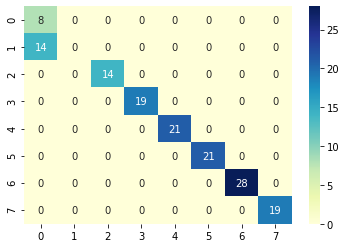

In [92]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_preds), cmap='YlGnBu',annot=True)

In [93]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7222222222222222

In [94]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8888888888888888

<AxesSubplot:>

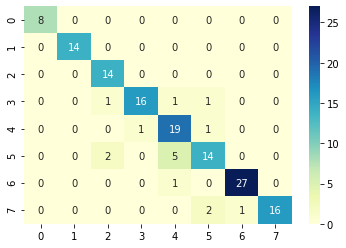

In [95]:
y_preds_c = clf.predict(X_test)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_preds_c), cmap='YlGnBu',annot=True)

In [96]:
print(classification_report(y_test, y_preds_c))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        14
         3.0       0.82      1.00      0.90        14
         4.0       0.94      0.84      0.89        19
         5.0       0.73      0.90      0.81        21
         6.0       0.78      0.67      0.72        21
         7.0       0.96      0.96      0.96        28
         8.0       1.00      0.84      0.91        19

    accuracy                           0.89       144
   macro avg       0.90      0.90      0.90       144
weighted avg       0.90      0.89      0.89       144

